In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
from nltk.corpus import stopwords
warnings.filterwarnings("ignore", category=DeprecationWarning)
from textblob import TextBlob
from textblob import Word
from textblob import Blobber
%matplotlib inline

In [2]:
import tensorflow as tf

C:\Users\kanik\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
train = pd.read_csv("labeledTrainData.tsv", header=0, \
                    delimiter="\t", quoting=3)

In [4]:
train.head()

id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3  "3630_4"          0  "It must be assumed that those who praised thi...
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...

In [5]:
train.shape

(25000, 3)

In [6]:
train.columns.values

array(['id', 'sentiment', 'review'], dtype=object)

In [7]:
print (train["review"][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

<H3> Number of Words

In [8]:
train['word_count'] = train['review'].apply(lambda x: len(str(x).split(" ")))

In [9]:
train[['review','word_count']].head()

review  word_count
0  "With all this stuff going down at the moment ...         433
1  "\"The Classic War of the Worlds\" by Timothy ...         158
2  "The film starts with a manager (Nicholas Bell...         378
3  "It must be assumed that those who praised thi...         379
4  "Superbly trashy and wondrously unpretentious ...         367

<H3> Number of characters

In [10]:
train['char_count'] = train['review'].str.len() ## this also includes spaces

In [11]:
train[['review','char_count']].head()

review  char_count
0  "With all this stuff going down at the moment ...        2304
1  "\"The Classic War of the Worlds\" by Timothy ...         948
2  "The film starts with a manager (Nicholas Bell...        2451
3  "It must be assumed that those who praised thi...        2247
4  "Superbly trashy and wondrously unpretentious ...        2233

<H3> Average Word Length

In [12]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))


In [13]:
train['avg_word'] = train['review'].apply(lambda x: avg_word(x))

In [14]:
train[['review','avg_word']].head()

review  avg_word
0  "With all this stuff going down at the moment ...  4.323326
1  "\"The Classic War of the Worlds\" by Timothy ...  5.006329
2  "The film starts with a manager (Nicholas Bell...  5.486772
3  "It must be assumed that those who praised thi...  4.931398
4  "Superbly trashy and wondrously unpretentious ...  5.087193

<H3> Number of stopwords

In [15]:
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kanik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
train['stopwords'] = train['review'].apply(lambda x: len([x for x in x.split() if x in stop]))

In [17]:
train[['review','stopwords']].head()

review  stopwords
0  "With all this stuff going down at the moment ...        190
1  "\"The Classic War of the Worlds\" by Timothy ...         69
2  "The film starts with a manager (Nicholas Bell...        118
3  "It must be assumed that those who praised thi...        169
4  "Superbly trashy and wondrously unpretentious ...        134

<H3> Number of special characters

In [18]:
train['hastags'] = train['review'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))

In [19]:
train[['review','hastags']].head()

review  hastags
0  "With all this stuff going down at the moment ...        0
1  "\"The Classic War of the Worlds\" by Timothy ...        0
2  "The film starts with a manager (Nicholas Bell...        0
3  "It must be assumed that those who praised thi...        0
4  "Superbly trashy and wondrously unpretentious ...        0

In [20]:
train[train['hastags'] > 0 ]

id  sentiment  \
125      "2982_1"          0   
166      "2977_1"          0   
424      "2425_4"          0   
457      "7328_2"          0   
475      "3628_1"          0   
490     "11832_7"          1   
666      "6015_1"          0   
1254     "1670_8"          1   
1277      "732_7"          1   
1360     "321_10"          1   
1394    "10696_3"          0   
1515     "1983_1"          0   
1622    "11527_1"          0   
2075      "142_8"          1   
2279     "5746_9"          1   
2438    "10062_1"          0   
3058    "10354_9"          1   
3288     "916_10"          1   
3459   "11154_10"          1   
3632       "37_9"          1   
3875     "4573_1"          0   
4208     "6599_1"          0   
4404   "11098_10"          1   
4463    "7432_10"          1   
4634     "4354_8"          1   
4702    "11940_4"          0   
4844     "1710_7"          1   
4860     "8188_1"          0   
5056   "11233_10"          1   
5078     "7873_1"          0   
...           ...        ...   
18868   "6685_10"          1   
18915    "5192_3"          0   
19728    "8865_4"          0   
19769   "12108_9"          1   
19847    "9661_8"          1   
20108    "3955_1"          0   
20506    "1398_7"          1   
20898    "3320_2"          0   
20959  "11115_10"          1   
21186    "7287_2"          0   
21380    "3321_7"          1   
21687     "993_2"          0   
21826   "11028_8"          1   
21877    "7286_2"          0   
22426    "8657_1"          0   
22638    "9096_1"          0   
22974    "9364_3"          0   
23022    "6218_3"          0   
23200    "4506_1"          0   
23208    "611_10"          1   
23251    "6454_9"          1   
23267    "3834_9"          1   
23531   "5846_10"          1   
23674    "6116_8"          1   
23686    "3863_1"          0   
23894     "735_8"          1   
24393    "7489_1"          0   
24404  "11991_10"          1   
24567    "3966_9"          1   
24604   "5799_10"          1   

                                                  review  word_count  \
125    "Zombie Review #3<br /><br />**Spoilers**<br /...         804   
166    "Title: Zombie 3 (1988) <br /><br />Directors:...         933   
424    "### Spoilers! ### <br /><br />What is this mo...         181   
457    "I see a lot of people liked this movie. To me...         818   
475    "An art house maven's dream. Overrated, overpr...         117   
490    "Time for a rant, eh: I thought Spirit was a g...         428   
666    "Never before have the motives of the producer...         494   
1254   "Channel 4 is a channel that allows more naugh...         198   
1277   "Well, I have finally caught up with \"Rock 'N...         327   
1360   "I don't know how or why this film has a meage...         467   
1394   "On the surface, this movie would appear to de...         444   
1515   "Oh, come on people give this film a break. Th...         280   
1622   "<br /><br />The movie starts out as an ordina...         155   
2075   "Second part (actually episode 4-8) of the hit...         138   
2279   "Words are seriously not enough convey the emo...         119   
2438   "Nintendo!!! YOU #%$@ERS!!! How could you do t...         194   
3058   "A CRY IN THE DARK <br /><br />A CRY IN THE DA...         567   
3288   "My Comments for VIVAH :- Its a charming, idea...         997   
3459   "In my opinion, this is one of the greatest mo...         302   
3632   "Of the elements that make this the best at th...         128   
3875   "I didn't know much about this movie before I ...         976   
4208   "Who was George C. Scott? George C. Scott was ...         552   
4404   "Brendan Filone is the absolute best character...         125   
4463   "A blockbuster at the time of it's original re...         737   
4634   "I saw this film back at the 2005 Palm Springs...         170   
4702   "Well, I'd be lying if I said that this could ...         385   
4844   "This movie is an exact copy of a TV series on...         385   
4860   "The mo

<H3> Number of numerics

In [21]:
train['numerics'] = train['review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [22]:
train[['review','numerics']].head()

review  numerics
0  "With all this stuff going down at the moment ...         1
1  "\"The Classic War of the Worlds\" by Timothy ...         0
2  "The film starts with a manager (Nicholas Bell...         0
3  "It must be assumed that those who praised thi...         1
4  "Superbly trashy and wondrously unpretentious ...         1

<H3> Number of Uppercase words

In [23]:
train['upper'] = train['review'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

In [24]:
train[['review','upper']].head()

review  upper
0  "With all this stuff going down at the moment ...     10
1  "\"The Classic War of the Worlds\" by Timothy ...      4
2  "The film starts with a manager (Nicholas Bell...      4
3  "It must be assumed that those who praised thi...      2
4  "Superbly trashy and wondrously unpretentious ...      3

<H2> Basic Pre-processing

<H3> Lower case

In [25]:
train['review'] = train['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [26]:
train['review'].head()

0    "with all this stuff going down at the moment ...
1    "\"the classic war of the worlds\" by timothy ...
2    "the film starts with a manager (nicholas bell...
3    "it must be assumed that those who praised thi...
4    "superbly trashy and wondrously unpretentious ...
Name: review, dtype: object

### Removing Punctuation

In [27]:
train['review'] = train['review'].str.replace('[^\w\s]','')

In [28]:
train['review'].head()

0    with all this stuff going down at the moment w...
1    the classic war of the worlds by timothy hines...
2    the film starts with a manager nicholas bell g...
3    it must be assumed that those who praised this...
4    superbly trashy and wondrously unpretentious 8...
Name: review, dtype: object

<H3> Removal of Stop Words

In [29]:
stop = stopwords.words('english')
train['review'] = train['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [30]:
train['review'].head()

0    stuff going moment mj ive started listening mu...
1    classic war worlds timothy hines entertaining ...
2    film starts manager nicholas bell giving welco...
3    must assumed praised film greatest filmed oper...
4    superbly trashy wondrously unpretentious 80s e...
Name: review, dtype: object

<H3> Common word removal

In [31]:
freq = pd.Series(' '.join(train['review']).split()).value_counts()[:17]
freq.drop('good', inplace = True)
freq

br        57138
movie     41808
film      37454
one       25508
like      19642
even      12504
would     12135
time      11780
really    11663
story     11452
see       11223
much       9583
well       9372
get        9211
also       9073
people     8951
dtype: int64

In [32]:
freq = list(freq.index)
train['review'] = train['review'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [33]:
train['review'].head()

0    stuff going moment mj ive started listening mu...
1    classic war worlds timothy hines entertaining ...
2    starts manager nicholas bell giving welcome in...
3    must assumed praised greatest filmed opera eve...
4    superbly trashy wondrously unpretentious 80s e...
Name: review, dtype: object

<H3> Rare words removal

In [34]:
freq = pd.Series(' '.join(train['review']).split()).value_counts()[-30:]
freq

potions                 1
fanatasies              1
perfectthough           1
ringwraithsbakshis      1
aprils                  1
voguebr                 1
crispies                1
greedbr                 1
haitian                 1
emergesbut              1
spookedentertainedbr    1
dolemitebr              1
assnaked                1
nottoohelpful           1
octopusses              1
allkaakha               1
onif                    1
fanclub                 1
medicals                1
melnick                 1
stupidthis              1
beattylife              1
laterespecially         1
musmannos               1
raphs                   1
janikowski              1
cutanddry               1
keshu                   1
twistsdevices           1
trista                  1
dtype: int64

In [35]:
freq = list(freq.index)
train['review'] = train['review'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [36]:
train['review'].head()

0    stuff going moment mj ive started listening mu...
1    classic war worlds timothy hines entertaining ...
2    starts manager nicholas bell giving welcome in...
3    must assumed praised greatest filmed opera eve...
4    superbly trashy wondrously unpretentious 80s e...
Name: review, dtype: object

<H3> Spelling correction

In [37]:
len(train['review'])

25000

In [38]:
# from textblob.sentiments import NaiveBayesAnalyzer
# tb = Blobber(analyzer=NaiveBayesAnalyzer())

In [39]:
# for i in range(0,10):    
#     tb(str(train['review'][i])).correct()

In [40]:
train['review'][0]

'stuff going moment mj ive started listening music watching odd documentary watched wiz watched moonwalker maybe want certain insight guy thought cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature remember going cinema originally released subtle messages mjs feeling towards press obvious message drugs bad mkaybr visually impressive course michael jackson unless remotely mj anyway going hate find boring may call mj egotist consenting making mj fans say made fans true nice himbr actual feature bit finally starts 20 minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pescis character ranted wanted know supplying drugs etc dunno maybe hates mjs musicbr lots cool things mj turning car robot whole speed demon sequence director must patience saint came filming kiddy bad sequence usually directors hate working kid let alone whole bunch performing complex dan

In [41]:
#train['review'][:1].apply(lambda x: str(TextBlob(x).correct()))

<H3> Tokenization

In [42]:
tokenized_review = train['review'].apply(lambda x: x.split())
tokenized_review.head()

0    [stuff, going, moment, mj, ive, started, liste...
1    [classic, war, worlds, timothy, hines, enterta...
2    [starts, manager, nicholas, bell, giving, welc...
3    [must, assumed, praised, greatest, filmed, ope...
4    [superbly, trashy, wondrously, unpretentious, ...
Name: review, dtype: object

<H3> Stemming

In [43]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [44]:
train['review'] = train['review'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [45]:
train['review'].head()

0    stuff go moment mj ive start listen music watc...
1    classic war world timothi hine entertain obvio...
2    start manag nichola bell give welcom investor ...
3    must assum prais greatest film opera ever didn...
4    superbl trashi wondrous unpretenti 80 exploit ...
Name: review, dtype: object

<H3> Lemmatization

In [46]:
train['review'] = train['review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [47]:
train['review'].head()

0    stuff go moment mj ive start listen music watc...
1    classic war world timothi hine entertain obvio...
2    start manag nichola bell give welcom investor ...
3    must assum prais greatest film opera ever didn...
4    superbl trashi wondrous unpretenti 80 exploit ...
Name: review, dtype: object

<H2> Advance Text Processing

<H3> N-grams

In [ ]:
#for i in range(0, len(train['review'])):
#TextBlob(train['review'][1]).ngrams(2)

<H3> Term frequency
<H5> <p> TF = (Number of times term T appears in the particular row) / (number of terms in that row)


In [ ]:
#tf1 = (train['review'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()

In [ ]:
#for i,word in enumerate(tf1['words']):
    #tf1.loc[i, 'idf'] = np.log(train.shape[0]/(len(train[train['review'].str.contains(word)])))

<H3> Word Cloud

In [48]:
from wordcloud import WordCloud

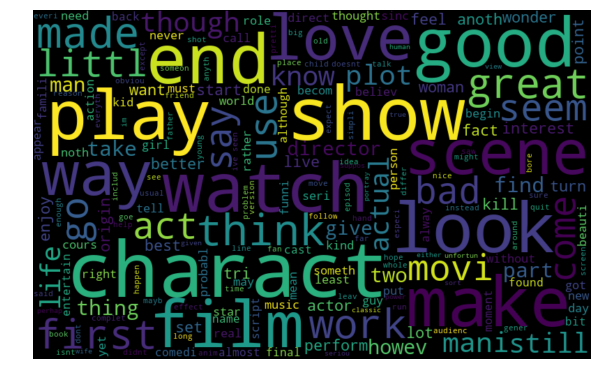

In [49]:
all_words = ' '.join([str(text) for text in train['review']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [50]:
train.head()

id  sentiment                                             review  \
0  "5814_8"          1  stuff go moment mj ive start listen music watc...   
1  "2381_9"          1  classic war world timothi hine entertain obvio...   
2  "7759_3"          0  start manag nichola bell give welcom investor ...   
3  "3630_4"          0  must assum prais greatest film opera ever didn...   
4  "9495_8"          1  superbl trashi wondrous unpretenti 80 exploit ...   

   word_count  char_count  avg_word  stopwords  hastags  numerics  upper  
0         433        2304  4.323326        190        0         1     10  
1         158         948  5.006329         69        0         0      4  
2         378        2451  5.486772        118        0         0      4  
3         379        2247  4.931398        169        0         1      2  
4         367        2233  5.087193        134        0         1      3

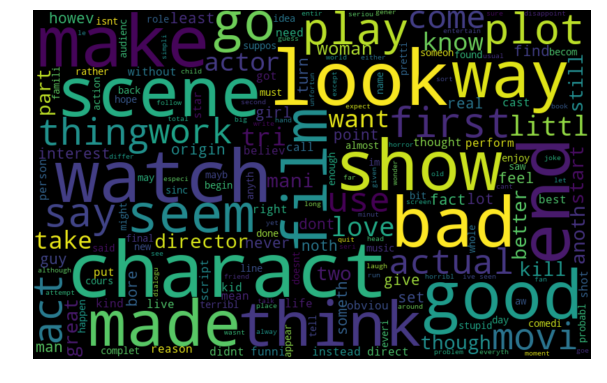

In [51]:
negative_words =' '.join([str(text) for text in (train['review'][train['sentiment'] == 0])])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

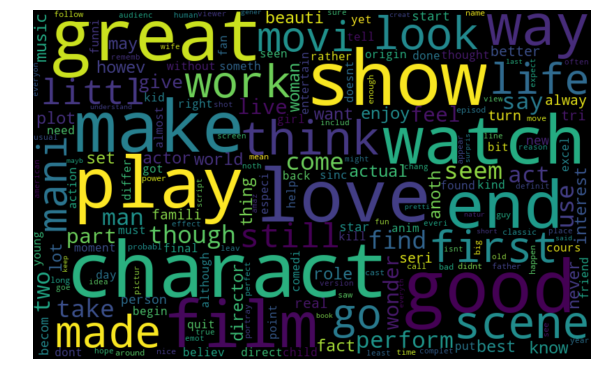

In [52]:
positive_words =' '.join([str(text) for text in (train['review'][train['sentiment'] == 1])])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [53]:
# def hashtag_extract(x):
#     hashtags = []
#     # Loop over the words in the tweet
#     for i in x:
#         ht = re.findall(r"#(\w+)", i)
#         hashtags.append(ht)

#     return hashtags

In [54]:
# # extracting hashtags from non racist/sexist tweets

# HT_regular = hashtag_extract(train['review'][train['sentiment'] == 0])

# # extracting hashtags from racist/sexist tweets
# HT_negative = hashtag_extract(train['review'][train['sentiment'] == 1])

# # unnesting list
# HT_regular = sum(HT_regular,[])
# HT_negative = sum(HT_negative,[])

<H3> Count Vectorizer

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=5000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(train['review'])

In [57]:
bow = bow.toarray()

In [58]:
print (bow.shape)

(25000, 5000)


In [59]:
vocab =  bow_vectorizer.get_feature_names()

In [60]:
# Sum up the counts of each vocabulary word
dist = np.sum(bow, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print (count, tag)

2127 10
423 100
69 1000
255 1010
217 11
174 110
502 12
185 13
80 13th
182 14
476 15
108 16
129 17
134 18
71 1920
202 1930
78 1933
70 1936
62 1939
138 1940
62 1945
305 1950
173 1960
85 1968
64 1969
277 1970
76 1971
90 1972
84 1973
64 1976
60 1977
72 1978
70 1979
278 1980
65 1981
89 1983
78 1984
73 1986
75 1987
66 1988
73 1989
188 1990
62 1991
75 1993
59 1994
74 1995
96 1996
74 1997
97 1999
72 19th
136 1st
648 20
161 2000
133 2001
107 2002
107 2003
111 2004
123 2005
147 2006
92 2007
70 2008
117 20th
109 210
60 21st
63 22
66 23
126 24
186 25
107 2nd
603 30
88 3000
155 310
80 35
121 3d
101 3rd
400 40
162 410
126 45
64 4th
490 50
405 60
676 70
189 710
70 73
74 75
808 80
203 810
584 90
145 910
120 911
285 abandon
117 abc
550 abil
1240 abl
81 abomin
69 aborigin
90 abort
81 aboutbr
87 abraham
74 abrupt
60 abruptli
117 absenc
74 absent
1837 absolut
125 absorb
379 absurd
64 abund
387 abus
103 abysm
297 academi
665 accent
763 accept
163 access
325 accid
245 accident
111 acclaim
196 accompani
261 

183 core
65 corman
189 corner
252 corni
208 corp
187 corpor
288 correct
75 correctli
257 corrupt
432 cost
184 costar
658 costum
71 couch
170 couldv
475 count
65 counter
74 counterpart
134 countless
1019 countri
100 countrysid
82 coup
1862 coupl
191 courag
2470 cours
212 court
178 cousin
889 cover
67 cow
234 cowboy
84 cowork
125 cox
216 crack
263 craft
118 craig
943 crap
244 crappi
341 crash
122 craven
78 crawford
75 crawl
89 craze
671 crazi
75 cream
1636 creat
164 creation
462 creativ
207 creator
520 creatur
300 credibl
1239 credit
153 creep
645 creepi
570 crew
744 cri
816 crime
522 crimin
146 cring
80 crippl
144 crisi
59 crisp
1031 critic
78 critiqu
101 crocodil
111 crook
61 crosbi
385 cross
82 crow
286 crowd
84 crown
90 crucial
200 crude
178 cruel
74 cruelti
142 cruis
183 crush
86 crystal
108 cuba
64 cuban
143 cube
99 cue
78 culmin
460 cult
692 cultur
133 cup
228 cur
133 cure
135 curio
256 curiou
69 curli
375 current
132 curti
137 cusack
68 cush
115 custom
1367 cut
578 cute
85 cyborg

139 ha
89 habit
132 hack
60 hackman
74 hackney
281 hadnt
70 hain
513 hair
104 hal
1712 half
208 halfway
224 hall
229 halloween
77 hallucin
116 ham
125 hamilton
144 hamlet
146 hammer
72 hammi
76 han
1940 hand
501 handl
226 handsom
433 hang
239 hank
69 hapless
3480 happen
1063 happi
147 happili
2402 hard
113 hardcor
111 harder
178 hardi
609 hardli
60 harlow
115 harm
69 harmless
70 harold
710 harri
66 harrison
211 harsh
104 hart
100 hartley
105 harvey
252 hat
1237 hate
118 hatr
510 haunt
816 havent
135 hawk
82 hay
102 hbo
1896 head
62 headach
85 heal
135 health
63 healthi
68 heap
1038 hear
1094 heard
1338 heart
111 heartbreak
79 heartfelt
102 heartwarm
148 heat
335 heaven
403 heavi
178 heavili
218 heck
182 hed
79 heel
148 height
70 heist
336 held
151 helen
121 helicopt
1087 hell
81 hello
66 helm
2774 help
79 helpless
153 henc
80 henchman
413 henri
65 hepburn
140 herbr
185 herebr
1265 hero
126 heroic
333 heroin
99 hesit
135 heston
384 hey
337 hidden
409 hide
100 hideou
1916 high
281 higher

81 nicola
70 niec
2172 night
64 nightclub
406 nightmar
63 nina
75 nineti
115 ninja
98 niro
153 nobl
457 nobodi
118 nod
389 noir
201 nois
75 nolan
69 nolt
390 nomin
118 non
151 nonetheless
169 nonexist
343 nonsens
88 nonstop
109 noon
63 nope
78 norm
748 normal
122 norman
201 north
66 northern
158 nose
91 nostalg
88 nostalgia
292 notabl
101 notbr
133 notch
965 note
4216 noth
765 notic
136 notion
187 notori
83 novak
1098 novel
159 nowaday
75 nowbr
424 nowher
131 nuanc
125 nuclear
195 nude
568 nuditi
59 numb
1348 number
273 numer
80 nun
155 nurs
144 nut
87 nyc
456 ob
356 object
71 oblig
70 obligatori
173 obnoxi
175 obscur
265 observ
74 obstacl
101 obtain
1041 obviou
1156 obvious
168 occas
446 occasion
62 occup
87 occupi
372 occur
117 ocean
662 odd
155 oddli
65 offbeat
81 offbr
210 offend
255 offens
1030 offer
920 offic
184 offici
1350 oh
61 ohara
142 oil
987 ok
673 okay
4080 old
645 older
71 oldest
243 oliv
105 olivi
95 olli
87 omen
61 omin
166 onbr
218 onebr
98 onedimension
159 onelin
92 

85 simultan
207 sin
235 sinatra
2860 sinc
191 sincer
899 sing
313 singer
908 singl
162 sinist
184 sink
181 sir
90 sirk
88 sissi
975 sister
1238 sit
217 sitcom
272 site
1145 situat
106 sixti
148 size
72 skeptic
125 sketch
537 skill
228 skin
381 skip
133 skit
92 skull
331 sky
76 slam
204 slap
182 slapstick
83 slash
504 slasher
135 slaughter
147 slave
61 sleaz
164 sleazi
528 sleep
66 sleepwalk
111 slice
95 slick
94 slide
138 slight
120 slightest
533 slightli
70 slimi
142 slip
121 sloppi
1064 slow
408 slowli
90 slug
60 smack
1580 small
102 smaller
391 smart
123 smash
74 smell
446 smile
466 smith
245 smoke
123 smooth
161 snake
94 snap
60 snatch
138 sneak
79 sniper
97 snl
143 snow
274 soap
64 sobr
165 socal
99 soccer
601 social
672 societi
82 soderbergh
210 soft
76 softcor
156 sold
749 soldier
249 sole
502 solid
103 solo
98 solut
229 solv
294 somebodi
68 someday
2345 someon
4931 someth
63 somethingbr
1255 sometim
958 somewhat
472 somewher
1410 son
1840 song
1161 soon
68 sooner
62 sophi
165 s

<H3> Tf-IDF

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
tfidf = TfidfVectorizer(max_features=5000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(train['review'])


In [64]:
train_vect = train_vect.toarray()

In [65]:
train_vect

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<H3> Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


In [70]:
train_bow = bow[:21000,:]
test_bow = bow[21000:,:]


In [74]:
train_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [75]:
#splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['sentiment'][:21000], random_state=42, test_size=0.3)

In [76]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int) # calculating f1 score

0.8555522118567559

In [79]:
logistic_test = pd.read_csv("testData.tsv", header=0, delimiter="\t",quoting=3 )

In [80]:
logistic_test.head()

id                                             review
0  "12311_10"  "Naturally in a film who's main themes are of ...
1    "8348_2"  "This movie is a disaster within a disaster fi...
2    "5828_4"  "All in all, this is a movie for kids. We saw ...
3    "7186_2"  "Afraid of the Dark left me with the impressio...
4   "12128_7"  "A very accurate depiction of small time mob l...

In [81]:
#test data cleaning review

logistic_test['review'] = logistic_test['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [83]:
logistic_test['review'] = logistic_test['review'].str.replace('[^\w\s]','')

In [84]:
stop = stopwords.words('english')
logistic_test['review'] = logistic_test['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [87]:
freq = pd.Series(' '.join(logistic_test['review']).split()).value_counts()[:12]

In [89]:
freq.drop('good', inplace = True)

In [91]:
freq.drop('like', inplace = True)

In [92]:
freq = list(freq.index)
logistic_test['review'] = logistic_test['review'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [98]:
freq = pd.Series(' '.join(train['review']).split()).value_counts()[-30:]

In [99]:
freq

meola                    1
overtimebr               1
loselosebr               1
olvidado                 1
skepticismbr             1
thirtyish                1
victimsthi               1
nci                      1
soprana                  1
premièr                  1
ahitchcock               1
psychodynam              1
scrollbr                 1
contemperan              1
movessingl               1
iu                       1
herepepp                 1
labouredli               1
dinerbr                  1
sensationbr              1
ahe                      1
jorybr                   1
rollebal                 1
loiretcail               1
subaud                   1
röse                     1
anymoreth                1
cultmovierentalplacei    1
dispassionatebr          1
klaus                    1
dtype: int64

In [100]:
freq = list(freq.index)
logistic_test['review'] = logistic_test['review'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [101]:
#from symspellpy.symspellpy import SymSpell, Verbosity

In [102]:
tokenized_review = logistic_test['review'].apply(lambda x: x.split())
tokenized_review.head()

0    [naturally, whos, main, themes, mortality, nos...
1    [disaster, within, disaster, full, great, acti...
2    [kids, saw, tonight, child, loved, point, kids...
3    [afraid, dark, left, impression, several, diff...
4    [accurate, depiction, small, mob, life, filmed...
Name: review, dtype: object

In [103]:
logistic_test['review'] = logistic_test['review'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [104]:
logistic_test['review'] = logistic_test['review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [105]:
bow_test = bow_vectorizer.fit_transform(logistic_test['review'])

In [106]:
test_pred = lreg.predict_proba(bow_test)

In [108]:
prediction_test= test_pred[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_test = prediction_test.astype(np.int)

In [109]:
prediction_test

array([1, 0, 0, ..., 0, 0, 0])

In [112]:
output = pd.DataFrame( data={"id":logistic_test["id"], "sentiment":prediction_test})

In [113]:
output.to_csv( "Bag_of_Words_test.csv", index=False, quoting=3 )

<H3> Random Forest

In [115]:
print ("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

Training the random forest...


In [122]:
# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 200) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( bow, train["sentiment"] )

In [123]:
test_forest_pred = forest.predict(bow_test)

In [124]:
test_forest_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [125]:
output = pd.DataFrame( data={"id":logistic_test["id"], "sentiment":test_forest_pred})

In [126]:
output.to_csv( "Bag_of_Words_test_forest.csv", index=False, quoting=3 )

In [127]:
# Initialize a Random Forest classifier with 100 trees
forest_tf = RandomForestClassifier(n_estimators = 200) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest_tf = forest_tf.fit( train_vect, train["sentiment"] )

In [128]:
test_idf = tfidf.fit_transform(logistic_test['review'])

In [130]:
test_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [131]:
test_forest_pred_tf = forest_tf.predict(test_idf)

In [132]:
output = pd.DataFrame( data={"id":logistic_test["id"], "sentiment":test_forest_pred_tf})

In [133]:
output.to_csv( "Bag_of_Words_test_forest_tf.csv", index=False, quoting=3 )